# /*******************************************************
* Copyright         : 2022 Vaibhav Khandare
* Description       : RNN task :- Recurrent neural networks recognize data's sequential characteristics and use patterns to predict the next likely scenario. 
*                    
* Revision History  :
* 		Author 		
        Vaibhav Khandare 
* ------------------------------------------------------------------
/******************************************************************/

In [ ]:
import numpy as np

In [2]:
import matplotlib.pyplot  as  plt

In [3]:
time = np.arange(0,1500)

In [4]:
time.shape

(1500,)

In [27]:
ytarget = np.sin(0.02  *  time)  +  np.random.uniform(low=-1,   high=1, size=(1500,))


In [28]:
y = np.sin(0.02  *  time)

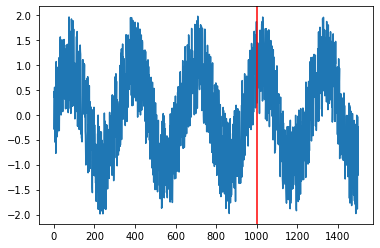

In [29]:
# 
plt.plot(ytarget)
# plt.plot(y)
plt.axvline(1000,  c='r')

In [30]:
ytarget.shape

(1500,)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
normalizer = MinMaxScaler(feature_range=(0,1 ) ) 

In [32]:
ytarget_normal = np.reshape(ytarget , (-1,1))

In [33]:
ytarget_normal.shape

(1500, 1)

In [34]:
yfinal = normalizer.fit_transform(ytarget_normal)

In [35]:
yfinal.shape

(1500, 1)

In [36]:
ytarget[0]

-0.2834027264805983

In [37]:
yfinal[0]

array([0.43033812])

In [39]:
normalizer.inverse_transform([[0.43033812]]  )

array([[-0.28340272]])

In [26]:
yfinal

array([[0.26979211],
       [0.3267904 ],
       [0.43720622],
       ...,
       [0.078464  ],
       [0.3742708 ],
       [0.23726334]])

In [40]:
train= yfinal[0:1000]

In [12]:
train.shape

(1000,)

In [41]:
test= yfinal[1000:]

In [14]:
test.shape

(500,)

In [15]:
train.shape

(1000,)

In [27]:
len(train) -  10

990

In [28]:
for  i   in  range(5):
    print(i)

0
1
2
3
4


In [42]:
def createDS( data  , step):
    X = []
    y = []
    for i in range(len(data) - step):
        X.append(data[ i:i+step ])
        y.append(data[i+step])
    return np.array(X) ,  np.array(y)

In [43]:
step = 10

In [44]:
trainX, trainY = createDS(train ,  step)

In [33]:
trainX.shape

(990, 10)

In [34]:
trainY.shape

(990,)

In [45]:
testX, testY = createDS(test ,  step)

In [36]:
testX.shape

(490, 10)

In [38]:
testY.shape

(490,)

In [39]:
trainX[0]

array([ 0.56811267,  0.49689981, -0.13433078,  0.06156278,  0.72117695,
        0.69877306,  0.94263681,  0.30083258,  0.80233264,  1.02193807])

In [55]:
trainY[3]

0.5837935382174717

In [43]:
#train

In [46]:
from keras.models  import Sequential

In [47]:
from  keras.layers  import Dense

In [48]:
from  keras.layers import SimpleRNN

In [49]:
model  = Sequential()

In [50]:
model.add(   SimpleRNN(units=1 , activation='tanh')  )

In [51]:
model.add(  Dense(units=1,  activation='linear' ))

In [52]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',

In [53]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [54]:
model.fit(trainX , trainY,  epochs=500)

Epoch 1/500
31/31 [==============================] - 34s 3ms/step - loss: 0.3112
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 0.1949
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 0.1288
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0987
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0713
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0560
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0516
Epoch 9/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0525
Epoch 10/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 11/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0518
Epoch 12/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 13/500
31/31 [================

31/31 [==============================] - 0s 5ms/step - loss: 0.0239
Epoch 202/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 203/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 204/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 205/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0234
Epoch 206/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 207/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0228
Epoch 208/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 209/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0235
Epoch 210/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0232
Epoch 211/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 212/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 213/500
31/31 [=========

31/31 [==============================] - 0s 4ms/step - loss: 0.0239
Epoch 302/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 303/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0240
Epoch 304/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 305/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 306/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 307/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 308/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0251
Epoch 309/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0250
Epoch 310/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 311/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 312/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 313/500
31/31 [=========

31/31 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 402/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 403/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 404/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 405/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0259
Epoch 406/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 407/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 408/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0232
Epoch 409/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 410/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 411/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 412/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 413/500
31/31 [=========

In [55]:
loss = model.history.history['loss']

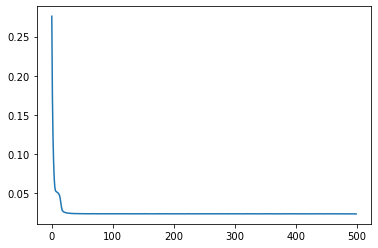

In [65]:
plt.plot(loss)

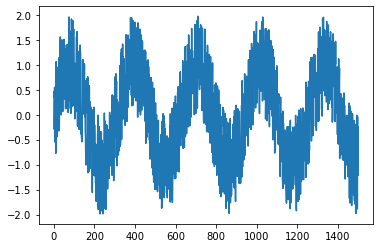

In [57]:
plt.plot(ytarget)

In [67]:
train_pred = normalizer.inverse_transform(model.predict(trainX) )
test_pred = normalizer.inverse_transform(model.predict(testX) )

In [69]:
train_pred.shape

(990, 1)

In [70]:
test_pred.shape

(490, 1)

In [72]:
predict = np.vstack((train_pred, test_pred) )

In [73]:
predict.shape

(1480, 1)

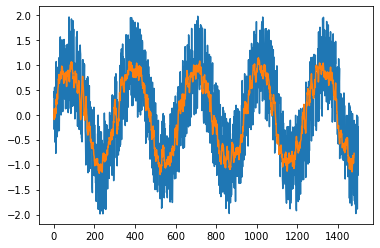

In [76]:
plt.plot(ytarget)
plt.plot(predict)
